# Plots for paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import laspy
import math

from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors

wd = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Final Version/"

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4


In [2]:
sampleBuilding1_parcel = "4157903DF3845E" 
sampleBuilding1_construction = "115082127"
sampleBuilding2_parcel = "4054901DF3845C" 
sampleBuilding2_construction = "115085840"

## Height Split

In [4]:
import Cluster
splitter = Cluster.HeightSplit(distance_threshold = 0.5)

In [14]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"
lasDF = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction + "/Map files/" + sampleBuilding1_construction + ".laz")
splitter.fit(lasDF.xyz)
lasDF.classification = splitter.labels_

x = lasDF.x
y = lasDF.y
z = lasDF.z

/tmp/ipykernel_79791/3413626420.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', len(unique_clusters))  # or another colormap


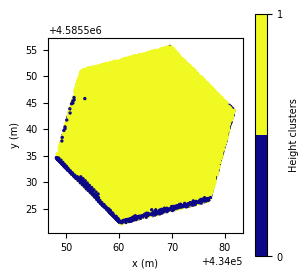

In [36]:
plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4

fig, ax = plt.subplots(figsize = (80*mm, 80*mm))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

unique_clusters = np.unique(lasDF.classification)
cmap = cm.get_cmap('plasma', len(unique_clusters))  # or another colormap
scatter = ax.scatter(x, y, c=lasDF.classification, s=2, cmap=cmap)

# Create colorbar with discrete ticks
cb = plt.colorbar(scatter)
cb.set_label('Height clusters')
cb.set_ticks(unique_clusters)  # Ensure the ticks match the clusters


ax.set_aspect("equal", adjustable='box')

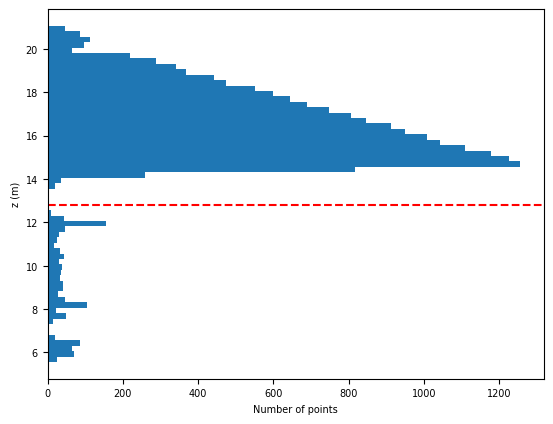

In [38]:
x = lasDF.x
y = lasDF.y
z = lasDF.z

distance_threshold = 0.5
fig, ax = plt.subplots()
Z = np.array(lasDF.z)
Z = Z[Z.argsort()]         
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), 0.5*distance_threshold)

# Horizontal histogram (vertical bars)
ax.hist(Z, bins, orientation='horizontal')

ax.set_ylabel("z (m)")
ax.set_xlabel("Number of points")

# Draw horizontal split lines instead of vertical
for split in heightSplits:
    ax.axhline(y=split+0.5*distance_threshold, color='red', linestyle='--', linewidth=1.5)


### Final plot

/tmp/ipykernel_79791/2344352378.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_clusters))


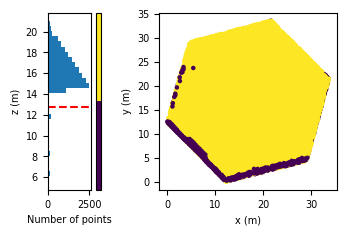

In [128]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"
lasDF = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction + "/Map files/" + sampleBuilding1_construction + ".laz")
splitter.fit(lasDF.xyz)
lasDF.classification = splitter.labels_

x = lasDF.x
y = lasDF.y
z = lasDF.z

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import gridspec

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4

x = lasDF.x - np.min(lasDF.x)
y = lasDF.y - np.min(lasDF.y)
z = lasDF.z

distance_threshold = 0.5
Z = np.array(z)
Z = Z[Z.argsort()]         
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), distance_threshold)


fig = plt.figure(figsize=(85*mm, 60*mm))

# --- Define a 1x3 gridspec: histogram | scatter | colorbar ---
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[2, 0.25, 10])

ax1 = fig.add_subplot(gs[0])   # histogram
ax2 = fig.add_subplot(gs[2])   # scatter
cax = fig.add_subplot(gs[1])   # colorbar axis

# --- Subplot 1: Vertical histogram ---
ax1.hist(Z, bins, orientation='horizontal')
ax1.set_ylabel("z (m)")
ax1.set_xlabel("Number of points")

for split in heightSplits:
    ax1.axhline(y=split+0.5*distance_threshold, color='red', linestyle='--', linewidth=1.5)

# --- Subplot 2: Scatter plot ---
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')

unique_clusters = np.unique(lasDF.classification)
cmap = cm.get_cmap('viridis', len(unique_clusters))  
scatter = ax2.scatter(x, y, c=lasDF.classification, s=5, cmap=cmap, rasterized=True)
ax2.set_aspect("equal", adjustable='box')

# --- Subplot 3: Colorbar (aligned by gridspec) ---
cb = fig.colorbar(scatter, cax=cax)
# cb.set_label('Height clusters')
cb.set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
pos2 = ax2.get_position()
ax2.set_position([pos2.x0+0.1, pos2.y0, pos2.width, pos2.height])  # add custom gap here


# plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit1.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()

/tmp/ipykernel_79791/2582401726.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_clusters))
/tmp/ipykernel_79791/2582401726.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax2.scatter(x[lasDF.classification==1], y[lasDF.classification==1], c="Yellow", s=5, cmap=cmap, rasterized=True)


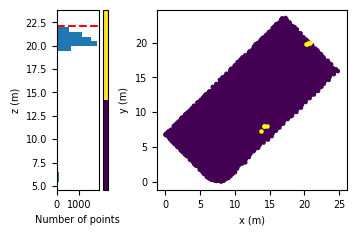

In [134]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"
lasDF = laspy.read(wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_construction + "/Map files/" + sampleBuilding2_construction + ".laz")
splitter.fit(lasDF.xyz)
lasDF.classification = splitter.labels_

x = lasDF.x
y = lasDF.y
z = lasDF.z

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import gridspec

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4

x = lasDF.x - np.min(lasDF.x)
y = lasDF.y - np.min(lasDF.y)
z = lasDF.z

distance_threshold = 0.5
Z = np.array(z)
Z = Z[Z.argsort()]         
deltaZ = np.diff(Z, prepend=0)

heightSplits = []
for i in range(1, len(deltaZ)):
    if deltaZ[i] > distance_threshold:
        heightSplits.append(Z[i-1])

bins = np.arange(np.min(Z), np.max(Z), distance_threshold)


fig = plt.figure(figsize=(85*mm, 60*mm))

# --- Define a 1x3 gridspec: histogram | scatter | colorbar ---
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[2, 0.25, 10])

ax1 = fig.add_subplot(gs[0])   # histogram
ax2 = fig.add_subplot(gs[2])   # scatter
cax = fig.add_subplot(gs[1])   # colorbar axis

# --- Subplot 1: Vertical histogram ---
ax1.hist(Z, bins, orientation='horizontal')
ax1.set_ylabel("z (m)")
ax1.set_xlabel("Number of points")

for split in heightSplits:
    ax1.axhline(y=split+0.5*distance_threshold, color='red', linestyle='--', linewidth=1.5)

# --- Subplot 2: Scatter plot ---
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')

unique_clusters = np.unique(lasDF.classification)
cmap = cm.get_cmap('viridis', len(unique_clusters))  
scatter = ax2.scatter(x, y, c=lasDF.classification, s=5, cmap=cmap, rasterized=True)
scatter2 = ax2.scatter(x[lasDF.classification==1], y[lasDF.classification==1], c="Yellow", s=5, cmap=cmap, rasterized=True)
ax2.set_aspect("equal", adjustable='box')

# --- Subplot 3: Colorbar (aligned by gridspec) ---
cb = fig.colorbar(scatter, cax=cax)
# cb.set_label('Height clusters')
cb.set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
pos2 = ax2.get_position()
ax2.set_position([pos2.x0+0.1, pos2.y0, pos2.width, pos2.height])  # add custom gap here


# plt.tight_layout()
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit2.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import gridspec

plt.rcParams.update({
    # "font.family": "Times New Roman",
    "font.size": 7
})

mm = 1/25.4  # mm to inches

def plot_lasDF(lasDF, output_path, distance_threshold=0.5, cmap_name="viridis", highlight=False):
    """
    Create a vertical histogram + scatter plot with colorbar for a given lasDF.
    Saves the plot to output_path.
    """
    # Normalize coordinates
    x = lasDF.x - np.min(lasDF.x)
    y = lasDF.y - np.min(lasDF.y)
    z = lasDF.z

    # --- Compute vertical splits ---
    Z = np.array(z)
    Z = Z[Z.argsort()]
    deltaZ = np.diff(Z, prepend=0)

    heightSplits = []
    for i in range(1, len(deltaZ)):
        if deltaZ[i] > distance_threshold:
            heightSplits.append(Z[i-1])

    bins = np.arange(np.min(Z), np.max(Z), distance_threshold)

    # --- Create figure ---
    fig = plt.figure(figsize=(85*mm, 60*mm))  # fixed size

    gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[2, 0.25, 10])

    ax1 = fig.add_subplot(gs[0])   # histogram
    ax2 = fig.add_subplot(gs[2])   # scatter
    cax = fig.add_subplot(gs[1])   # colorbar

    # --- Vertical histogram ---
    ax1.hist(Z, bins, orientation='horizontal')
    ax1.set_ylabel("z (m)")
    ax1.set_xlabel("Number of points")

    for split in heightSplits:
        ax1.axhline(y=split+0.5*distance_threshold, color='red', linestyle='--', linewidth=1.5)

    # --- Scatter plot ---
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')

    unique_clusters = np.unique(lasDF.classification)
    cmap = cm.get_cmap(cmap_name, len(unique_clusters))

    scatter = ax2.scatter(
        x, y,
        c=lasDF.classification,
        s=5,
        cmap=cmap,
        rasterized=True
    )
    # Optional: highlight cluster 1 in yellow
    if(highlight):
        scatter2 = ax2.scatter(
            x[lasDF.classification==1],
            y[lasDF.classification==1],
            c="yellow",
            s=5,
            rasterized=True
        )

    ax2.set_aspect("equal", adjustable='box')

    # --- Colorbar ---
    cb = fig.colorbar(scatter, cax=cax)
    cb.set_ticks([])  # no ticks

    # --- Adjust spacing ---
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05)
    pos2 = ax2.get_position()
    ax2.set_position([pos2.x0+0.1, pos2.y0, pos2.width, pos2.height])  # custom gap
    ax2.set_box_aspect(1)

    # --- Save figure ---
    fig.savefig(output_path, dpi=600, bbox_inches='tight')
    plt.close(fig)  # close to free memory

# --- Example usage ---
experiment = "/Results/Best_Identifications_v2_planeExtract/"
lasDF1 = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction + "/Map files/" + sampleBuilding1_construction + ".laz")
splitter.fit(lasDF1.xyz)
lasDF1.classification = splitter.labels_
plot_lasDF(lasDF1, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit1.pdf")

lasDF2 = laspy.read(wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_construction + "/Map files/" + sampleBuilding2_construction + ".laz")
splitter.fit(lasDF2.xyz)
lasDF2.classification = splitter.labels_
plot_lasDF(lasDF2, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit2.pdf", highlight=True)


/tmp/ipykernel_79791/136655672.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, len(unique_clusters))
/tmp/ipykernel_79791/136655672.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, len(unique_clusters))


In [165]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import laspy
import matplotlib.ticker as mticker

plt.rcParams.update({"font.size": 7})
mm_to_inch = 1 / 25.4  # convert mm to inches

def plot_lasDF_fixed_size(lasDF, output_path,
                          scatter_width_mm=50, scatter_height_mm=50,
                          distance_threshold=0.5, cmap_name="viridis", highlight=False):
    """
    Plot a LAS dataframe with vertical histogram + scatter + colorbar,
    ensuring the scatter has a fixed physical size (in mm) for x and y axes.
    """
    # --- Normalize coordinates ---
    x = lasDF.x - np.min(lasDF.x)
    y = lasDF.y - np.min(lasDF.y)
    z = lasDF.z

    # --- Compute vertical splits ---
    Z = np.array(z)
    Z = Z[Z.argsort()]
    deltaZ = np.diff(Z, prepend=0)

    heightSplits = []
    for i in range(1, len(deltaZ)):
        if deltaZ[i] > distance_threshold:
            heightSplits.append(Z[i-1])

    bins = np.arange(np.min(Z), np.max(Z), distance_threshold)

    # --- Convert sizes to inches ---
    # scatter_width_in = scatter_width_mm * mm_to_inch
    # scatter_height_in = scatter_height_mm * mm_to_inch

    # # Add margins for histogram and colorbar
    # left_margin_in = 15 * mm_to_inch
    # right_margin_in = 15 * mm_to_inch
    # top_margin_in = 10 * mm_to_inch
    # bottom_margin_in = 10 * mm_to_inch

    # fig_width_in = scatter_width_in + left_margin_in + right_margin_in
    # fig_height_in = scatter_height_in + top_margin_in + bottom_margin_in

    width = 85
    height = 56

    fig = plt.figure(figsize=(width*mm, height*mm))

    # --- Positions in figure fraction coordinates ---
    # left, bottom, width, height (fractions of figure size)

    hist_ax = fig.add_axes([12 / width,
                            10 / height,
                            12 / width,  # histogram width fraction
                            45 / height])

    scatter_ax = fig.add_axes([39 / width,  # space after histogram
                               10 / height,
                               45 / width,
                               45 / height])

    cbar_ax = fig.add_axes([25 / width,
                            10 / height,
                            2 / width,  # colorbar width
                            45 / height])

    # --- Vertical histogram ---
    hist_ax.hist(Z, bins, orientation='horizontal')
    hist_ax.set_ylabel("z (m)")
    hist_ax.set_xlabel("Number of points")
    for split in heightSplits:
        hist_ax.axhline(y=split + 0.5 * distance_threshold, color='red', linestyle='--', linewidth=1.5)
    hist_ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

    # --- Scatter plot ---
    unique_clusters = np.unique(lasDF.classification)
    cmap = cm.get_cmap(cmap_name, len(unique_clusters))

    scatter = scatter_ax.scatter(x, y, c=lasDF.classification, s=5, cmap=cmap, rasterized=True)
    # optional highlight cluster 1
    if(highlight):
        scatter_ax.scatter(x[lasDF.classification==1], y[lasDF.classification==1], c="yellow", s=5, rasterized=True)

    scatter_ax.set_xlabel("x (m)")
    scatter_ax.set_ylabel("y (m)")
    range_x = x.max()
    range_y = y.max()
    range_max = np.max([range_x, range_y])
    scatter_ax.set_xlim([-2, range_max + 2])
    scatter_ax.set_ylim([-2, range_max + 2])
    scatter_ax.set_aspect("equal")  # keep square scaling

    # --- Colorbar ---
    cb = fig.colorbar(scatter, cax=cbar_ax)
    cb.set_ticks([])

    # --- Save figure ---
    fig.savefig(output_path, dpi=600)
    plt.close(fig)

# --- Example usage ---
experiment = "/Results/Best_Identifications_v2_planeExtract/"
lasDF1 = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction + "/Map files/" + sampleBuilding1_construction + ".laz")
splitter.fit(lasDF1.xyz)
lasDF1.classification = splitter.labels_
plot_lasDF_fixed_size(lasDF1, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit1.pdf")

lasDF2 = laspy.read(wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_construction + "/Map files/" + sampleBuilding2_construction + ".laz")
splitter.fit(lasDF2.xyz)
lasDF2.classification = splitter.labels_
plot_lasDF_fixed_size(lasDF2, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/HeightSplit2.pdf", highlight=True)



/tmp/ipykernel_79791/1563483524.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, len(unique_clusters))
/tmp/ipykernel_79791/1563483524.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, len(unique_clusters))


## Voronoi raw and clean

In [540]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, MultiPoint, MultiPolygon, GeometryCollection, Point
from shapely import make_valid, intersection
from shapely.ops import unary_union
from scipy.spatial import Voronoi

def get_boundary(bound, offset = 100, steps=10):
    x_bottom_top = np.linspace(bound[0] - offset, bound[2] + offset, steps)
    y_left_right = np.linspace(bound[1] - offset, bound[3] + offset, steps)

    bottom_points = np.column_stack([x_bottom_top, np.repeat(bound[1] - offset, steps)])
    top_points = np.column_stack([x_bottom_top, np.repeat(bound[3] + offset, steps)])
    left_points = np.column_stack([np.repeat(bound[0] - offset, steps), y_left_right])
    right_points = np.column_stack([np.repeat(bound[2] + offset, steps), y_left_right])
    boundarycoords = np.vstack([bottom_points, top_points, left_points, right_points])
    boundarycoords = np.unique(boundarycoords, axis=0)
    return boundarycoords

def obtainLabelsPolygons(vorAll, labels):
    voronoi_polygons_list = []
    clustersPolygons = []

    for idx_region, region in enumerate(vorAll.regions):
        if(region):
            indices = np.where(vorAll.point_region[0:len(labels)] == idx_region)
            selectedLabels = labels[indices]
            if -1 not in region:
                if(np.all(selectedLabels == selectedLabels[0])):
                    polygon = Polygon(vorAll.vertices[region])
                    clustersPolygons.append(selectedLabels[0])
                    voronoi_polygons_list.append(polygon)
                else:   
                    try:
                        outline = Polygon(vorAll.vertices[region])
                        points = vorAll.points[indices]
                        if(not np.all((points == points[0]).all())):
                            boundarycoords = get_boundary(outline.bounds)
                            allPoints = np.concatenate((points[:,0:2], boundarycoords))
                            miniVor = Voronoi(allPoints)
                            subVorList, subClusterList = obtainLabelsPolygons(miniVor, selectedLabels)
                            subVorList = [intersection(x.buffer(0), outline.buffer(0)) for x in subVorList]
                            voronoi_polygons_list += subVorList
                            clustersPolygons += subClusterList
                        else:
                            clustersPolygons.append(selectedLabels[0])
                            voronoi_polygons_list.append(outline)
                    except RecursionError:
                        # print("There was an Infinite Recursion Error!")
                        clustersPolygons.append(selectedLabels[0])
                        outline = Polygon(vorAll.vertices[region])
                        voronoi_polygons_list.append(outline)

    return voronoi_polygons_list, clustersPolygons

def getVoronoiClipped(points, labels, cadasterGDF):

    boundarycoords = get_boundary(cadasterGDF.geometry.total_bounds)
    allPoints = np.concatenate((points[:,0:2], boundarycoords))
    vorAll = Voronoi(allPoints)


    # extract valid polygons
    voronoi_polygons_list = []
    clustersPolygons = []

    # for i in range(len(points)):
    #     idx_region = vorAll.point_region[i]
    #     if -1 not in vorAll.regions[idx_region]:
    #         polygon = Polygon(vorAll.vertices[vorAll.regions[idx_region]])
    #         clustersPolygons.append(labels[i])
    #         voronoi_polygons_list.append(polygon)

    voronoi_polygons_list, clustersPolygons = obtainLabelsPolygons(vorAll, labels)

    vorGDF = gpd.GeoDataFrame({"geometry":voronoi_polygons_list, "cluster":clustersPolygons}, crs=cadasterGDF.crs)
    
    vorGDF["geometry"] = vorGDF.geometry.apply(make_valid)
    vorGDF["geometry"] = vorGDF["geometry"].buffer(0.01)
    vorGDF["geometry"] = vorGDF["geometry"].buffer(-0.01)
    merged_gdf = vorGDF    
    merged_gdf["geometry"] = merged_gdf["geometry"].apply(unary_union)
    clippedGDF = gpd.clip(merged_gdf, cadasterGDF, sort=True)

    return clippedGDF

In [541]:
def plot_Voronoi_RAW(clippedGDF, filename):
    width = 35
    height = 35

    fig = plt.figure(figsize=(width*mm, height*mm))

    # --- Positions in figure fraction coordinates ---
    # left, bottom, width, height (fractions of figure size)

    plot_ax = fig.add_axes([0,  # space after histogram
                                0.1,
                                0.8,
                                0.8])

    cbar_ax = fig.add_axes([0.5,
                            0.1,
                            0.5,  # colorbar width
                            0.8])

    clusters = sorted(clippedGDF["cluster"].unique())  # Get unique cluster values
    num_clusters = len(clusters)

    # Set up the colormap and boundaries
    cmap = plt.get_cmap("hsv", num_clusters)  # Discrete version of the colormap
    boundaries = np.arange(min(clusters), max(clusters) + 2)  # Create boundaries for the clusters
    norm = BoundaryNorm(boundaries, cmap.N, extend="neither")

    clippedGDF.plot(
        column="cluster",
        edgecolor="black",
        linewidth=0,
        cmap=cmap,
        norm=norm,
        ax=plot_ax,
        rasterized=True
    )

    xlim = (clippedGDF.total_bounds[0], clippedGDF.total_bounds[2])
    ylim = (clippedGDF.total_bounds[1], clippedGDF.total_bounds[3])
    plot_ax.set_xlim(xlim)
    plot_ax.set_ylim(ylim)
    plot_ax.axis("off")
    cbar_ax.axis("off")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for ScalarMappable
    cbar = fig.colorbar(sm, ax=cbar_ax, boundaries=boundaries, ticks=[0,len(clusters)-1])
    cbar.set_ticklabels(['0', '1'])
    # cbar.outline.set_visible(False)
    # plt.tight_layout()

    fig.savefig(filename, dpi=600, bbox_inches="tight")
    plt.show()

In [542]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"

constructionFolder = wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction
construction = sampleBuilding1_construction

cadasterPath = constructionFolder + "/Map files/" + construction + ".gpkg"
cadasterGDF = gpd.read_file(cadasterPath)

newLasFile = constructionFolder + "/Plane Identification/" + construction + ".laz"
newLasDF = laspy.read(newLasFile)

clippedGDF1 = getVoronoiClipped(newLasDF.xyz, newLasDF.classification, cadasterGDF)

cleanCadasterPath = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
cleanGDF1 = gpd.read_file(cleanCadasterPath)
cleanGDF1["cluster"] = cleanGDF1["cluster"] - cleanGDF1["cluster"].min()

############### Change from 1 to 2 

experiment = "/Results/Best_Identifications_v2_planeExtract/"
constructionFolder = wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_construction
construction = sampleBuilding2_construction

cadasterPath = constructionFolder + "/Map files/" + construction + ".gpkg"
cadasterGDF = gpd.read_file(cadasterPath)

newLasFile = constructionFolder + "/Plane Identification/" + construction + ".laz"
newLasDF = laspy.read(newLasFile)

clippedGDF2 = getVoronoiClipped(newLasDF.xyz, newLasDF.classification, cadasterGDF)

cleanCadasterPath = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
cleanGDF2 = gpd.read_file(cleanCadasterPath)
cleanGDF2["cluster"] = cleanGDF2["cluster"] - cleanGDF2["cluster"].min()


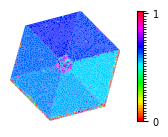

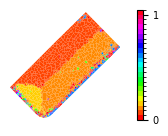

In [543]:
plot_Voronoi_RAW(clippedGDF1, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi1.pdf")
plot_Voronoi_RAW(clippedGDF2, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi2.pdf")

In [544]:
def plot_Voronoi_Clean(cleanGDF, filename):
    width = 35
    height = 35

    fig = plt.figure(figsize=(width*mm, height*mm))

    # --- Positions in figure fraction coordinates ---
    # left, bottom, width, height (fractions of figure size)

    plot_ax = fig.add_axes([0,  # space after histogram
                                0.1,
                                0.8,
                                0.8])

    cbar_ax = fig.add_axes([0.5,
                            0.1,
                            0.5,  # colorbar width
                            0.8])

    clusters = cleanGDF.index.values  # Get unique cluster values
    num_clusters = len(clusters)

    # Set up the colormap and boundaries
    cmap = plt.get_cmap("rainbow", num_clusters)  # Discrete version of the colormap
    cmap = mcolors.ListedColormap(cmap(np.arange(num_clusters)), name='Pastel1_with_alpha')
    cmap.colors[:, -1] = 0.67
    boundaries = np.arange(min(clusters), max(clusters) + 2)  # Create boundaries for the clusters
    norm = BoundaryNorm(boundaries, cmap.N, extend="neither")

    cleanGDF.plot(
        column="cluster",
        edgecolor="black",
        linewidth=0.5,
        cmap=cmap,
        norm=norm,
        ax=plot_ax,
    )

    xlim = (cleanGDF.total_bounds[0], cleanGDF.total_bounds[2])
    ylim = (cleanGDF.total_bounds[1], cleanGDF.total_bounds[3])
    plot_ax.set_xlim(xlim)
    plot_ax.set_ylim(ylim)
    plot_ax.axis("off")
    cbar_ax.axis("off")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for ScalarMappable
    cbar = fig.colorbar(sm, ax=cbar_ax, boundaries=boundaries, ticks=clusters)
    

    # plt.tight_layout()

    fig.savefig(filename, dpi=600, bbox_inches="tight")
    plt.show()

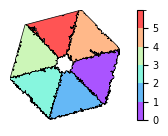

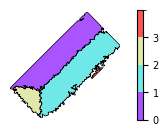

In [545]:
plot_Voronoi_Clean(cleanGDF1, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi_Clean1.pdf")
plot_Voronoi_Clean(cleanGDF2, "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi_Clean2.pdf")

In [546]:
from pypdf import PdfMerger

pdfs = ["/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi1.pdf", 
        "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi2.pdf",
        "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi_Clean1.pdf",
        "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Voronoi_Clean2.pdf"]

merger = PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Exports/Voronois.pdf")
merger.close()

/tmp/ipykernel_79791/13608372.py:8: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger()


## Shading

In [393]:
import os
import numpy as np
import pandas as pd
import laspy
import json
import geopandas as gpd
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from shapely import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker


### Overall

In [3]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"

lasneighborhoodDF = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_parcel + "_50m.laz")
lasneighborhoodDF

<LasData(1.4, point fmt: <PointFormat(8, 0 bytes of extra dims)>, 447373 points, 2 vlrs)>

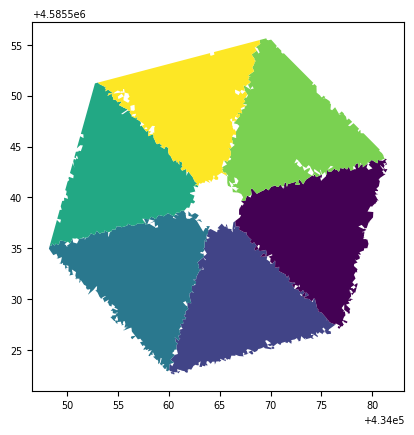

In [325]:
construction = sampleBuilding1_construction
constructionFolder = wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction
constructionFile = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
planesGDF = gpd.read_file(constructionFile)
planesGDF.plot(column='cluster')
lasConstruction = laspy.read(constructionFolder + "/Plane Identification/" + construction + ".laz")

#### Create DEM

In [329]:
import pygmt
spacing = 0.3
region = pygmt.info(data=lasneighborhoodDF.xyz, spacing=spacing)
df_trimmed = pygmt.blockmedian(data=lasneighborhoodDF.xyz, T=0.99, spacing = spacing, region = region)
df_trimmed = df_trimmed.rename(columns={0:"x",1:"y",2:"z"})

grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography

/tmp/ipykernel_79791/236555547.py:7: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography
surface [WARNING]: 271 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


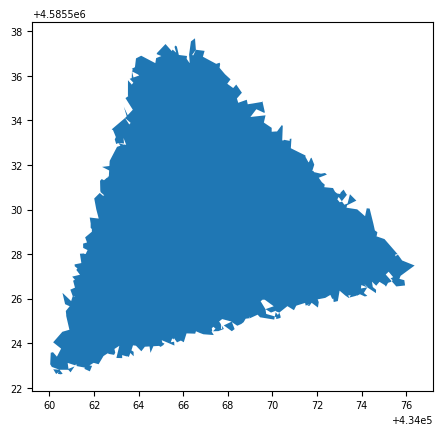

In [334]:
clusterID = 23

planesGDF[planesGDF.cluster==clusterID].plot()
azimuth = planesGDF[planesGDF.cluster==clusterID].azimuth.values[0]

In [335]:
x = grid.x.values  # Extract x-coordinates
y = grid.y.values  # Extract y-coordinates
z = grid.values    # Extract grid values (z)

# Create a numpy meshgrid
X, Y = np.meshgrid(x, y)
z.shape

(452, 453)

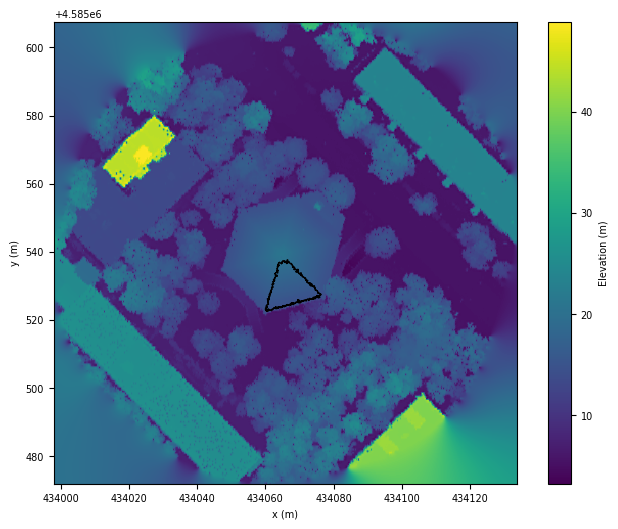

In [336]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto')

planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

fig.colorbar(c, ax=ax, label="Elevation (m)")
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect("equal", adjustable='box')
plt.show()

#### Sampling Points

In [342]:
shadingPath = constructionFolder + "/Shading/" + str(clusterID) + ".csv"
shadingMatrix = pd.read_csv(shadingPath, header=None)
samplingPoints = shadingMatrix[[0,1,2]]
samplingPoints = samplingPoints.rename(columns={0:"x",1:"y",2:"z"})
samplingPoints

,x,y,z
0,434060.25,4585523.25,14.64
1,434060.25,4585524.00,14.95
2,434061.00,4585523.25,14.56
3,434061.00,4585524.00,14.87
4,434061.00,4585524.75,15.18
...,...,...,...
218,434074.50,4585527.75,14.96
219,434074.50,4585528.50,15.27
220,434074.50,4585529.25,15.58
221,434075.25,4585527.75,14.88


#### Plot

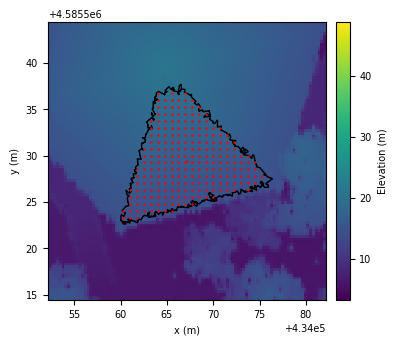

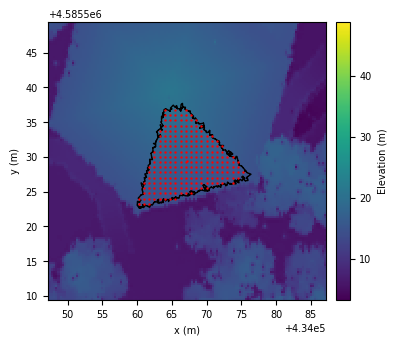

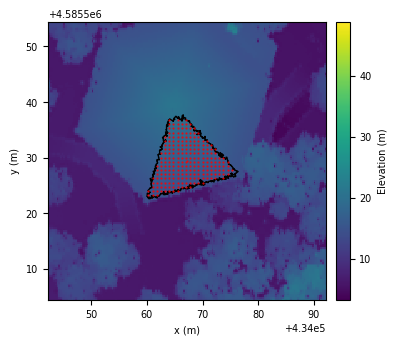

In [538]:
minSizes=[15, 20, 25]
pointS = [0.5, 0.5, 0.25]

for i in range(len(minSizes)):
    minSize = minSizes[i]

    clusterPoints = lasConstruction[lasConstruction.classification == clusterID]
    clusterPoints = clusterPoints.xyz
    shapely_points = [Point(p[:2]) for p in clusterPoints]
    geometry = planesGDF[planesGDF.cluster == clusterID].geometry.values
    inside_points = [point for point, shapely_point in zip(clusterPoints, shapely_points) if geometry.contains(shapely_point)]

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(110*mm, 91.75*mm))
    c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto', rasterized = True)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    fig.colorbar(c, cax=cax, label="Elevation (m)")

    # Plot the GeoDataFrame over the surface plot
    planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

    # Adjust axis limits and labels if needed
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')


    point = [planesGDF[planesGDF.cluster==clusterID].centroid.x.values[0], planesGDF[planesGDF.cluster==clusterID].centroid.y.values[0]]
    ax.scatter(samplingPoints.x, samplingPoints.y, s=pointS[i], c="red")
    # Show the plot

    ax.set_xlim(point[0]-minSize, point[0]+minSize)
    ax.set_ylim(point[1]-minSize, point[1]+minSize)
    ax.set_aspect("equal", adjustable='box')

    # plt.tight_layout()
    plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingSampling_" + str(minSize) + ".pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only

#### Merge all options to pdf

In [539]:
from pypdf import PdfMerger

pdfs = ["/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingSampling_15.pdf", 
        "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingSampling_20.pdf",
        "/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingSampling_25.pdf"]

merger = PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Exports/ShadingSampling.pdf")
merger.close()

/tmp/ipykernel_79791/3392335824.py:7: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger()


#### Elevation map

In [386]:
centroid = samplingPoints.iloc[-1]
point = [centroid.x, centroid.y, centroid.z]
Z_point = point[2] + 0.05

In [387]:
tiltangle = np.zeros(X.shape)
distance = np.sqrt((X[:,:] - point[0])**2 + (Y[:,:] - point[1])**2)
tiltangle = np.arctan2((z[:,:] - Z_point), distance[:,:])*180/math.pi
tiltangle = np.maximum(tiltangle, 0)
azimuthAngle = np.zeros(X.shape)
azimuthAngle = np.arctan2(X[:,:] - point[0], Y[:,:] - point[1])*180/math.pi
azimuthAngle = np.where(azimuthAngle < 0, azimuthAngle + 360, azimuthAngle)
azimuthAngle = np.round(azimuthAngle).astype(int)

tiltangle.max()

np.float64(30.076231748517895)

/tmp/ipykernel_79791/3082226488.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick
/tmp/ipykernel_79791/3082226488.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])


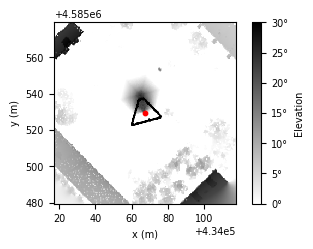

In [473]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(110*mm, 60*mm))

c = ax.pcolormesh(X, Y, tiltangle, cmap='gray_r', shading='auto', rasterized = True)
cb = fig.colorbar(c, ax=ax, label="Elevation")

# Customize colorbar ticks
cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick



# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

minSize=50

ax.set_xlim(point[0]-minSize, point[0]+minSize)
ax.set_ylim(point[1]-minSize, point[1]+minSize)

ax.scatter(point[0], point[1], s=10, c="red")

# === Format x-axis ticks ===
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=True)
ax.xaxis.set_major_formatter(formatter)

# Force drawing so that ticks are ready
fig.canvas.draw()

# Replace tick labels with only the last two digits
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])

# === Manually set offset text in scientific notation ===
value = xticks[0] - xticks[0] % 1000
formatted_offset = "+" + f"{value:.2e}".replace("+0", "").replace("+", "")
# ax.xaxis.get_offset_text().set_text(formatted_offset)
ax.xaxis.get_offset_text().set_visible(False)
offset_txt = ax.text(
    1, -0.18, formatted_offset,
    transform=ax.transAxes,
    ha='right', va='bottom',
    fontsize=plt.rcParams['axes.labelsize']
)

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingElevation.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Exports/ShadingElevation.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()

/tmp/ipykernel_79791/1924117892.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick
/tmp/ipykernel_79791/1924117892.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])


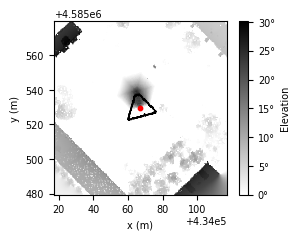

[162.56 121.92]


<Figure size 640x480 with 0 Axes>

In [525]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt

width = 80
height = 55
fig = plt.figure(figsize=(width*mm, height*mm))
 # left, bottom, width, height (fractions of figure size)
ax = fig.add_axes([0.05,
                    0.05,
                    0.8,
                    0.8])

c = ax.pcolormesh(X, Y, tiltangle, cmap='gray_r', shading='auto', rasterized = True)
cb = fig.colorbar(c, ax=ax, label="Elevation")

# Customize colorbar ticks
cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick



# Plot the GeoDataFrame over the surface plot
planesGDF[planesGDF.cluster==clusterID].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# Adjust axis limits and labels if needed
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

minSize=50

ax.set_xlim(point[0]-minSize, point[0]+minSize)
ax.set_ylim(point[1]-minSize, point[1]+minSize)

ax.scatter(point[0], point[1], s=10, c="red")

# === Format x-axis ticks ===
formatter = mticker.ScalarFormatter(useOffset=False, useMathText=True)
ax.xaxis.set_major_formatter(formatter)

# Force drawing so that ticks are ready
fig.canvas.draw()

# Replace tick labels with only the last two digits
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])

# === Manually set offset text in scientific notation ===
value = xticks[0] - xticks[0] % 1000
formatted_offset = "+" + f"{value:.2e}".replace("+0", "").replace("+", "")
# ax.xaxis.get_offset_text().set_text(formatted_offset)
ax.xaxis.get_offset_text().set_visible(False)
offset_txt = ax.text(
    1, -0.18, formatted_offset,
    transform=ax.transAxes,
    ha='right', va='bottom',
    fontsize=plt.rcParams['axes.labelsize']
)

# Show the plot
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingElevation.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()
print(plt.gcf().get_size_inches()/mm)

#### Shading profile

In [489]:
azimuthAngle_flat = azimuthAngle.ravel()
tiltangle_flat = tiltangle.ravel()
df = pd.DataFrame({
    'azimuth': azimuthAngle_flat,
    'tiltangle': tiltangle_flat
})
# Group by azimuth and get the maximum tiltangle for each azimuth
max_tilt_df = df.groupby('azimuth')['tiltangle'].max().reset_index()
max_tilt_df

,azimuth,tiltangle
0,0,0.615193
1,1,22.716528
2,2,22.152614
3,3,22.314152
4,4,22.704928
...,...,...
356,356,22.887917
357,357,23.234901
358,358,22.246767
359,359,22.523045


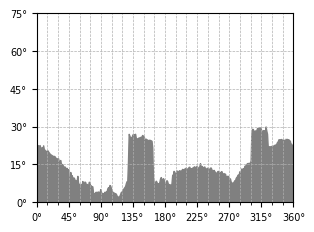

In [499]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt

width = 81.5
height = 60
fig = plt.figure(figsize=(width*mm, height*mm))
 # left, bottom, width, height (fractions of figure size)
ax = fig.add_axes([13.52/width,
                    0.05,
                    0.8,
                    0.8])
ax.fill_between(max_tilt_df.azimuth, 0, max_tilt_df.tiltangle, color="gray")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 360)
ax.set_ylim(0, 75)

ax = plt.gca()
ax.set_xticks(range(0, 361, 45))  # Major ticks every 45°
ax.set_xticks(range(0, 361, 15), minor=True)  # Minor ticks every 15°
ax.set_xticklabels([f"{tick}°" for tick in range(0, 361, 45)])

max_tilt = 75
ax.set_yticks(range(0, max_tilt + 1, 15))  # Major ticks every 10
ax.set_yticks(range(0, max_tilt + 1, 15), minor=True)  # Minor ticks every 5
ax.set_yticklabels([f"{tick}°" for tick in range(0, max_tilt + 1, 15)])

plt.show()

##### Hourly elevation

In [21]:
import pandas as pd

# Define the input file name
file_name = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/RAW_Data/PVGIS/horizon_41.419_2.211.csv"

# Initialize variables
table_start = False
columns = ["A", "H_hor", "A_sun(w)", "H_sun(w)", "A_sun(s)", "H_sun(s)"]
data = []

# Read the file line by line
with open(file_name, "r") as file:
    for line in file:
        line = line.strip()
        if line.startswith("A") and "H_hor" in line:  # Detect the start of the table
            table_start = True
            continue
        if table_start:
            if not line:  # Stop if an empty line is encountered
                break
            # Split and clean the data
            row = line.split()
            if len(row) == len(columns):  # Ensure row has the right number of columns
                data.append([float(value) for value in row])

# Create a DataFrame
elevation_df = pd.DataFrame(data, columns=columns)
elevation_df["A_sun(w)"] = elevation_df["A_sun(w)"] + 180
elevation_df["A_sun(s)"] = elevation_df["A_sun(s)"] + 180

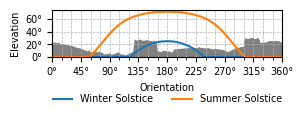

In [529]:
from mpl_interactions import panhandler, zoom_factory
import matplotlib.pyplot as plt

width = 73
height = 15
fig = plt.figure(figsize=(width*mm, height*mm))
 # left, bottom, width, height (fractions of figure size)
ax = fig.add_axes([13.66/width,
                    0.05,
                    0.8,
                    0.8])
ax.fill_between(max_tilt_df.azimuth, 0, max_tilt_df.tiltangle, color="gray")


plt.plot(elevation_df["A_sun(w)"], elevation_df["H_sun(w)"], label="Winter Solstice")
plt.plot(elevation_df["A_sun(s)"], elevation_df["H_sun(s)"], label="Summer Solstice")

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 360)
ax.set_ylim(0, 75)
ax.set_xlabel("Orientation")
ax.set_ylabel("Elevation")

ax = plt.gca()
ax.set_xticks(range(0, 361, 45))  # Major ticks every 45°
ax.set_xticks(range(0, 361, 15), minor=True)  # Minor ticks every 15°
ax.set_xticklabels([f"{tick}°" for tick in range(0, 361, 45)])

max_tilt = 75
ax.set_yticks(range(0, max_tilt + 1, 20))  # Major ticks every 10
ax.set_yticks(range(0, max_tilt + 1, 20), minor=True)  # Minor ticks every 5
ax.set_yticklabels([f"{tick}°" for tick in range(0, max_tilt + 1, 20)])

# plt.tight_layout()
# plt.gca().set_aspect("equal", adjustable='box')

plt.legend(
    loc='upper center',           # Base location
    bbox_to_anchor=(0.5, -0.6),   # X=0.5 (center), Y=1.05 (above plot)
    ncol=2,                       # One line with 2 columns
    fontsize=7,
    frameon=False
)

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingProfile.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only

plt.show()


### Building 1

In [4]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"

lasneighborhoodDF = laspy.read(wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_parcel + "_50m.laz")
construction = sampleBuilding1_construction
constructionFolder = wd + experiment + sampleBuilding1_parcel + "/" + sampleBuilding1_construction
constructionFile = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
planesGDF = gpd.read_file(constructionFile)
lasConstruction = laspy.read(constructionFolder + "/Plane Identification/" + construction + ".laz")

In [5]:
import pygmt
spacing = 0.3
region = pygmt.info(data=lasneighborhoodDF.xyz, spacing=spacing)
df_trimmed = pygmt.blockmedian(data=lasneighborhoodDF.xyz, T=0.99, spacing = spacing, region = region)
df_trimmed = df_trimmed.rename(columns={0:"x",1:"y",2:"z"})

grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography

/tmp/ipykernel_117129/236555547.py:7: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography
surface [WARNING]: 271 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


In [6]:
x = grid.x.values  # Extract x-coordinates
y = grid.y.values  # Extract y-coordinates
z = grid.values    # Extract grid values (z)

# Create a numpy meshgrid
X, Y = np.meshgrid(x, y)
z.shape

(452, 453)

In [7]:
centroids = planesGDF.geometry.centroid
avg_x = centroids.x.mean()
avg_y = centroids.y.mean()

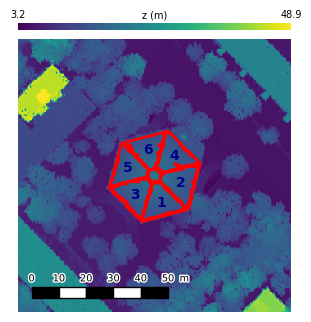

In [80]:
fig, ax = plt.subplots(figsize=(90*mm, 90*mm))
c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto', rasterized=True)

planesGDF.plot(ax=ax, color="None", edgecolor='red', linewidth=2)

# Get the position of the main axes
pos = ax.get_position()
cax = fig.add_axes([pos.x0, pos.y1 + 0.025, pos.width, 0.02])  # [left, bottom, width, height]
cb = fig.colorbar(c, cax=cax, orientation='horizontal')
# Hide the default ticks and tick marks
cb.ax.tick_params(length=0)  # remove tick marks
cb.set_ticks([])             # remove tick labels

# Manually add min and max labels above the colorbar
cmin, cmax = c.get_array().min(), c.get_array().max()
cb.ax.text(0, 1.5, f"{cmin:.1f}", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])
cb.ax.text(1, 1.5, f"{cmax:.1f}", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])

# Add the label z(m) centered above the numbers
cb.ax.text(0.5, 1.5, "z (m)", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])

for spine in cb.ax.spines.values():
    spine.set_visible(False)

## ====== AXIS STUFF ======================

ax.axis('off')  # removes axes, ticks, and labels
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect("equal", adjustable='box')
minSize = 50
ax.set_xlim(avg_x-minSize, avg_x+minSize)
ax.set_ylim(avg_y-minSize, avg_y+minSize)

limsx = [avg_x-minSize, avg_x+minSize]
limsy = [avg_y-minSize, avg_y+minSize]

for i, clusterID in enumerate(planesGDF.cluster):
    centroids = planesGDF[planesGDF.cluster == clusterID].centroid
    x, y = centroids.x.values[0], centroids.y.values[0]
    x = (x-limsx[0])/(limsx[1]-limsx[0])
    y = (y-limsy[0])/(limsy[1]-limsy[0])

    ax.text(
        x, y,  # x, y in axis fraction coordinates
        f"{i+1}",
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        color='darkblue',
        verticalalignment='center',
        horizontalalignment='center'
    )

# # Replace tick labels with only the last two digits
# xticks = ax.get_xticks()
# ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])

# # === Manually set offset text in scientific notation ===
# value = xticks[0] - xticks[0] % 1000
# formatted_offset = "+" + f"{value:.2e}".replace("+0", "").replace("+", "")
# # ax.xaxis.get_offset_text().set_text(formatted_offset)
# ax.xaxis.get_offset_text().set_visible(False)
# offset_txt = ax.text(
#     1, -0.18, formatted_offset,
#     transform=ax.transAxes,
#     ha='right', va='bottom',
#     fontsize=plt.rcParams['axes.labelsize']
# )
# --- Add checker-style scalebar below the plot ---
from matplotlib.patches import Rectangle
from matplotlib import patheffects

scalebar_length = 50
tick_step = 10
bar_height = 4  # height in data units
x_start = limsx[0] + 5
y_start = limsy[0] + 5  # adjust below plot

# Draw alternating black/white rectangles with black outlines
for i in range(0, scalebar_length, tick_step):
    color = 'black' if (i // tick_step) % 2 == 0 else 'white'
    rect = Rectangle((x_start + i, y_start), tick_step, bar_height,
                     facecolor=color, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Add tick labels above each rectangle with white stroke
for i in range(0, scalebar_length + tick_step, tick_step):
    xi = x_start + i
    txt = ax.text(
        xi, y_start + bar_height + 1.5, f"{i}", ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'],
        color='black'
    )
    # Add white stroke to text
    txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])
label_txt = ax.text(
    x_start + scalebar_length + 6, y_start + bar_height + 1.5, "m",
    ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'], color='black')
label_txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Shading1.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()

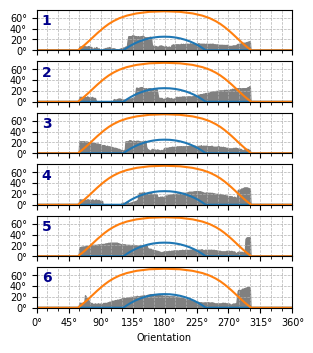

In [37]:
import matplotlib.pyplot as plt

num_clusters = len(planesGDF.cluster)
fig, axes = plt.subplots(num_clusters, 1, figsize=(80*mm, 15*mm*num_clusters), sharex=True)

# If there's only one cluster, axes won't be an array, so make it one
if num_clusters == 1:
    axes = [axes]

for i, clusterID in enumerate(planesGDF.cluster):
    shadingPath = constructionFolder + "/Shading/" + str(clusterID) + ".csv"
    shadingMatrix = pd.read_csv(shadingPath, header=None)
    centroid = shadingMatrix.iloc[-1]
    profile = centroid[3:].values

    ax = axes[i]
    ax.fill_between(range(360), 0, profile, color="gray")
    ax.plot(elevation_df["A_sun(w)"], elevation_df["H_sun(w)"], label="Winter Solstice")
    ax.plot(elevation_df["A_sun(s)"], elevation_df["H_sun(s)"], label="Summer Solstice")
    ax.text(
        0.02, 0.9,  # x, y in axis fraction coordinates
        f"{i+1}",
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        color='darkblue',
        verticalalignment='top',
        horizontalalignment='left'
    )

    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlim(0, 360)
    ax.set_ylim(0, 75)

    # ax.set_ylabel("Elevation")


    max_tilt = 75
    ax.set_yticks(range(0, max_tilt + 1, 20))  # Major ticks every 10
    ax.set_yticks(range(0, max_tilt + 1, 20), minor=True)  # Minor ticks every 5
    ax.set_yticklabels([f"{tick}°" for tick in range(0, max_tilt + 1, 20)])

ax.set_xticks(range(0, 361, 45))  # Major ticks every 45°
ax.set_xticks(range(0, 361, 15), minor=True)  # Minor ticks every 15°
ax.set_xticklabels([f"{tick}°" for tick in range(0, 361, 45)])
ax.set_xlabel("Orientation")
plt.tight_layout(h_pad=0.5) 

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingProfiles1.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()



### Building 2

In [81]:
experiment = "/Results/Best_Identifications_v2_planeExtract/"

lasneighborhoodDF = laspy.read(wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_parcel + "_50m.laz")
construction = sampleBuilding2_construction
constructionFolder = wd + experiment + sampleBuilding2_parcel + "/" + sampleBuilding2_construction
constructionFile = constructionFolder + "/Plane Identification/" + construction + ".gpkg"
planesGDF = gpd.read_file(constructionFile)
lasConstruction = laspy.read(constructionFolder + "/Plane Identification/" + construction + ".laz")

In [82]:
import pygmt
spacing = 0.3
region = pygmt.info(data=lasneighborhoodDF.xyz, spacing=spacing)
df_trimmed = pygmt.blockmedian(data=lasneighborhoodDF.xyz, T=0.99, spacing = spacing, region = region)
df_trimmed = df_trimmed.rename(columns={0:"x",1:"y",2:"z"})

grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography

/tmp/ipykernel_117129/236555547.py:7: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'tension' instead.
  grid = pygmt.surface(x=df_trimmed.x, y=df_trimmed.y, z=df_trimmed.z, spacing=spacing, region = region, T = 0.35) #T: check bibliography
surface [WARNING]: 533 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


In [100]:
x = grid.x.values  # Extract x-coordinates
y = grid.y.values  # Extract y-coordinates
z = grid.values    # Extract grid values (z)

# Create a numpy meshgrid
X, Y = np.meshgrid(x, y)
z.shape
z = z - np.min(z)

In [102]:
np.min(z)

np.float32(0.0)

In [98]:
np.max(lasneighborhoodDF.xyz[:,2])

np.float64(41.608000000000004)

In [84]:
centroids = planesGDF.geometry.centroid
avg_x = centroids.x.mean()
avg_y = centroids.y.mean()

In [88]:
planesGDF = planesGDF[planesGDF.cluster < 4]
planesGDF

,cluster,A,B,D,tilt,azimuth,silhouette,geometry
0,3,0.284618,0.254815,-1.291866e+06,20.908,228.162288,0.901152,"POLYGON ((433929.855 4585218.871, 433929.854 4..."
1,2,-0.252501,0.258791,-1.077023e+06,19.878,135.704792,0.881359,"POLYGON ((433933.508 4585215.621, 433933.508 4..."
3,1,0.263608,-0.263302,1.092932e+06,20.434,314.966750,0.860701,"POLYGON ((433927.283 4585220.982, 433927.283 4..."


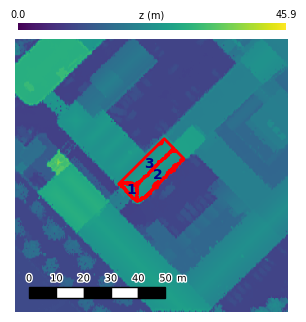

In [103]:
fig, ax = plt.subplots(figsize=(90*mm, 90*mm))
c = ax.pcolormesh(X, Y, z, cmap='viridis', shading='auto', rasterized=True)

planesGDF.plot(ax=ax, color="None", edgecolor='red', linewidth=2)

# Get the position of the main axes
pos = ax.get_position()
cax = fig.add_axes([pos.x0, pos.y1 + 0.025, pos.width, 0.02])  # [left, bottom, width, height]
cb = fig.colorbar(c, cax=cax, orientation='horizontal')
# Hide the default ticks and tick marks
cb.ax.tick_params(length=0)  # remove tick marks
cb.set_ticks([])             # remove tick labels

# Manually add min and max labels above the colorbar
cmin, cmax = c.get_array().min(), c.get_array().max()
cb.ax.text(0, 1.5, f"{cmin:.1f}", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])
cb.ax.text(1, 1.5, f"{cmax:.1f}", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])

# Add the label z(m) centered above the numbers
cb.ax.text(0.5, 1.5, "z (m)", transform=cb.ax.transAxes, ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'])

for spine in cb.ax.spines.values():
    spine.set_visible(False)

## ====== AXIS STUFF ======================

ax.axis('off')  # removes axes, ticks, and labels
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_aspect("equal", adjustable='box')
minSize = 50
ax.set_xlim(avg_x-minSize, avg_x+minSize)
ax.set_ylim(avg_y-minSize, avg_y+minSize)

limsx = [avg_x-minSize, avg_x+minSize]
limsy = [avg_y-minSize, avg_y+minSize]

for i, clusterID in enumerate(planesGDF.cluster):
    centroids = planesGDF[planesGDF.cluster == clusterID].centroid
    x, y = centroids.x.values[0], centroids.y.values[0]
    x = (x-limsx[0])/(limsx[1]-limsx[0])
    y = (y-limsy[0])/(limsy[1]-limsy[0])

    ax.text(
        x, y,  # x, y in axis fraction coordinates
        f"{i+1}",
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        color='darkblue',
        verticalalignment='center',
        horizontalalignment='center'
    )

# # Replace tick labels with only the last two digits
# xticks = ax.get_xticks()
# ax.set_xticklabels([f"{int(tick) % 1000:02d}" for tick in xticks])

# # === Manually set offset text in scientific notation ===
# value = xticks[0] - xticks[0] % 1000
# formatted_offset = "+" + f"{value:.2e}".replace("+0", "").replace("+", "")
# # ax.xaxis.get_offset_text().set_text(formatted_offset)
# ax.xaxis.get_offset_text().set_visible(False)
# offset_txt = ax.text(
#     1, -0.18, formatted_offset,
#     transform=ax.transAxes,
#     ha='right', va='bottom',
#     fontsize=plt.rcParams['axes.labelsize']
# )
# --- Add checker-style scalebar below the plot ---
from matplotlib.patches import Rectangle
from matplotlib import patheffects

scalebar_length = 50
tick_step = 10
bar_height = 4  # height in data units
x_start = limsx[0] + 5
y_start = limsy[0] + 5  # adjust below plot

# Draw alternating black/white rectangles with black outlines
for i in range(0, scalebar_length, tick_step):
    color = 'black' if (i // tick_step) % 2 == 0 else 'white'
    rect = Rectangle((x_start + i, y_start), tick_step, bar_height,
                     facecolor=color, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Add tick labels above each rectangle with white stroke
for i in range(0, scalebar_length + tick_step, tick_step):
    xi = x_start + i
    txt = ax.text(
        xi, y_start + bar_height + 1.5, f"{i}", ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'],
        color='black'
    )
    # Add white stroke to text
    txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])
label_txt = ax.text(
    x_start + scalebar_length + 6, y_start + bar_height + 1.5, "m",
    ha='center', va='bottom', fontsize=plt.rcParams['axes.labelsize'], color='black')
label_txt.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/Shading2.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()

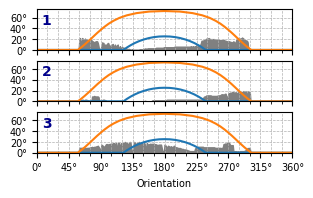

In [109]:
import matplotlib.pyplot as plt

num_clusters = len(planesGDF.cluster)
fig, axes = plt.subplots(num_clusters, 1, figsize=(80*mm, 16.9*mm*num_clusters), sharex=True)

# If there's only one cluster, axes won't be an array, so make it one
if num_clusters == 1:
    axes = [axes]

for i, clusterID in enumerate(planesGDF.cluster):
    shadingPath = constructionFolder + "/Shading/" + str(clusterID) + ".csv"
    shadingMatrix = pd.read_csv(shadingPath, header=None)
    centroid = shadingMatrix.iloc[-1]
    profile = centroid[3:].values

    ax = axes[i]
    ax.fill_between(range(360), 0, profile, color="gray")
    ax.plot(elevation_df["A_sun(w)"], elevation_df["H_sun(w)"], label="Winter Solstice")
    ax.plot(elevation_df["A_sun(s)"], elevation_df["H_sun(s)"], label="Summer Solstice")
    ax.text(
        0.02, 0.9,  # x, y in axis fraction coordinates
        f"{i+1}",
        transform=ax.transAxes,
        fontsize=10,
        fontweight='bold',
        color='darkblue',
        verticalalignment='top',
        horizontalalignment='left'
    )

    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlim(0, 360)
    ax.set_ylim(0, 75)

    # ax.set_ylabel("Elevation")


    max_tilt = 75
    ax.set_yticks(range(0, max_tilt + 1, 20))  # Major ticks every 10
    ax.set_yticks(range(0, max_tilt + 1, 20), minor=True)  # Minor ticks every 5
    ax.set_yticklabels([f"{tick}°" for tick in range(0, max_tilt + 1, 20)])

ax.set_xticks(range(0, 361, 45))  # Major ticks every 45°
ax.set_xticks(range(0, 361, 15), minor=True)  # Minor ticks every 15°
ax.set_xticklabels([f"{tick}°" for tick in range(0, 361, 45)])
ax.set_xlabel("Orientation")
plt.tight_layout(h_pad=0.5) 

plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingProfiles2.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only
plt.show()


## Panels results

## Boxplot experiments

In [330]:
import re


def group_by_constructions(metricsDF):
    # Define aggregation functions
    agg_funcs = {
        "cluster": lambda x: list(x),
        "silhouette": lambda x: (x * metricsDF.loc[x.index, "area"]).sum() / metricsDF.loc[x.index, "area"].sum()
    }

    result = metricsDF.groupby(["parcel", "construction"]).agg(agg_funcs).reset_index()
    result.rename(columns={"cluster": "clusters", "silhouette": "avg_silhouette"}, inplace=True)
    return result

def experiments_box_plots(expClass, expList, resultsPath, ofeach=3, full=True):
    
    silhouetteVectorList = []
    for metricsFile in expList:
        metricsDF = pd.read_csv(resultsPath + metricsFile)
        groupedMetrics = group_by_constructions(metricsDF)
        silhouetteVectorList.append(groupedMetrics["avg_silhouette"].values)
    

    num_iterations = []
    for text in expList:
        match = re.search(r"num_iterations_(.*?)_Metrics", text)
        num_iterations.append(match.group(1))

    inlierThreshold = []
    for text in expList:
        match = re.search(r"inlierThreshold_(.*?)_num_iterations", text)
        inlierThreshold.append(match.group(1))

    boxPlotDF = pd.DataFrame({"silhouette": silhouetteVectorList, "num_iterations": list(map(int,num_iterations)), "inlierThreshold": inlierThreshold})
    boxPlotDF["inlierThreshold"] = [float(s.replace("p",".")) for s in boxPlotDF["inlierThreshold"]]
    boxPlotDF = boxPlotDF.sort_values(by = ["inlierThreshold", "num_iterations"])

    
    if(full):
        fig, ax = plt.subplots(figsize = (87.5*mm, 60*mm))
    else:
        fig, ax = plt.subplots(figsize = (87.5*mm, 30*mm))
        
    boxplot = ax.boxplot(boxPlotDF["silhouette"], tick_labels=boxPlotDF["num_iterations"], patch_artist=True)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    unique_thresholds = sorted(boxPlotDF["inlierThreshold"].unique())
    # cmap = plt.get_cmap("Set2")
    # color_map = {thr: cmap(i / (len(unique_thresholds)-1)) for i, thr in enumerate(unique_thresholds)}
    color_map = dict(zip(unique_thresholds, plt.cm.Set2.colors[:len(unique_thresholds)]))

    for patch, thr in zip(boxplot['boxes'], boxPlotDF["inlierThreshold"]):
        patch.set_facecolor(color_map[thr])

    # colors = ["blue", "blue", "darkred", "darkred"]
    # for i, patch in enumerate(boxplot['boxes']):
    #     patch.set_facecolor(colors[i % 4])  # alternate colors

    for median in boxplot['medians']:
        median.set(color='black')

    last_thr = None
    if(full):
        line_y = -1.05  # y-position below x-axis for the horizontal line
    else:
        line_y = -0.05  # y-position below x-axis for the horizontal line

    for i, (patch, thr) in enumerate(zip(boxplot['boxes'], boxPlotDF["inlierThreshold"])):
        if thr != last_thr:  # only label the first of consecutive repeats
            y = max([line.get_ydata().max() for line in boxplot['whiskers'][2*i:2*i+2]])
            ax.text(i + ofeach/2+0.5, 1.05 + 0.03, f"{thr}", ha="center", va="bottom")
            # Draw horizontal line below the label
            underline = ax.plot([i + 0.75, i + ofeach + 0.25], [line_y, line_y], color=color_map[thr], linewidth=2)
            underline[0].set_clip_on(False)
            underline = ax.plot([i + 0.75, i + ofeach + 0.25], [1.05, 1.05], color=color_map[thr], linewidth=2)
            underline[0].set_clip_on(False)
        last_thr = thr
        

    # ax.text(len(boxplot['boxes']), 1.11 + 0.02, f"inlierThreshold", ha="right", va="bottom")
    ax.text(0.5, 1.215 + 0.02, f"inlierThreshold", ha="left", va="bottom")

    if(full):
        ax.set_ylim([-1,1])
    else:
        ax.set_ylim([0,1])
    ax.set_xlabel("numIterations")
    ax.set_ylabel("Silhouette Score")

    plt.grid()
    # ax.text(len(boxplot['boxes'])/2, 1.11 + 0.02, f"{expClass}", ha="center", va="bottom", fontdict={"fontsize":8,"fontweight":'bold'})
    plt.title(expClass, pad=27.5, fontdict={"fontweight":'bold'})
    plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/BoxPlot_" + expClass + "_full_" + str(full) + ".pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only¡
    plt.show()

### kPlanes

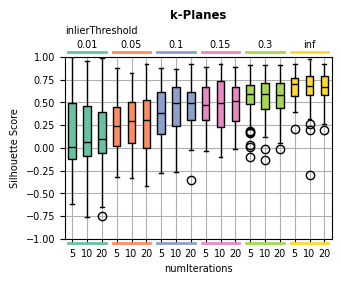

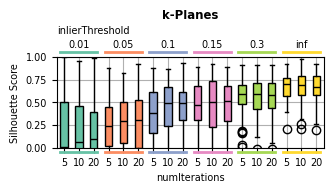

In [331]:
wd = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Final Version/"
resultsPath = wd + "Results/"

expClass = "kPlanes"
expList =  [x for x in os.listdir(resultsPath) if (os.path.isfile(resultsPath+x) and x.startswith(expClass) and x.endswith("Metrics.txt"))]
experiments_box_plots("k-Planes", expList, resultsPath, 3)
experiments_box_plots("k-Planes", expList, resultsPath, 3, full=False)

### Plane Extract

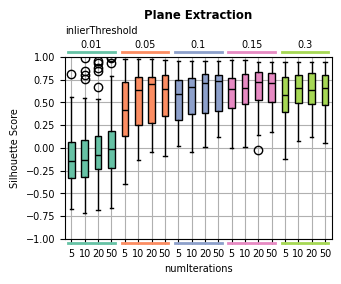

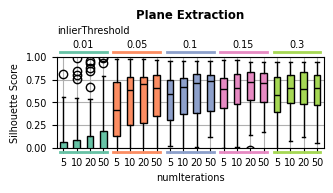

In [332]:
wd = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Final Version/"
resultsPath = wd + "Results/"

expClass = "v2_planeExtract"
expList =  [x for x in os.listdir(resultsPath) if (os.path.isfile(resultsPath+x) and x.startswith(expClass) and x.endswith("Metrics.txt"))]
experiments_box_plots("Plane Extraction", expList, resultsPath, 4)
experiments_box_plots("Plane Extraction", expList, resultsPath, 4, full=False)

## PlaneID results

## Shading histogram

In [333]:
import os
import geopandas as gpd

wd = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Final Version/"
resultsPath = wd + "/Results/"
experiment = "0_Results_for_paper_planeExtract_0p1_Shaded_30cmMesh"
parcelsFolder = resultsPath + experiment + "/"
solarGDF_list = []

for parcel in os.listdir(parcelsFolder):
    parcelSubfolder = parcelsFolder + parcel + "/"
    for construction in [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]:
        constructionFolder = parcelSubfolder + construction + "/"
        solarGDF = gpd.read_file(constructionFolder + "Solar Estimation Panels Simulated/" + construction + ".gpkg")
        solarGDF_list.append(solarGDF)

combined_gdf_Shaded = gpd.GeoDataFrame(pd.concat(solarGDF_list, ignore_index=True))
combined_gdf_Shaded["AC_Yearly"].mean()

np.float64(470.76802684954146)

In [334]:
import os
import geopandas as gpd

wd = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Final Version/"
resultsPath = wd + "/Results/"
experiment = "0_Results_for_paper_planeExtract_0p1_Unshaded"
parcelsFolder = resultsPath + experiment + "/"
solarGDF_list = []

for parcel in os.listdir(parcelsFolder):
    parcelSubfolder = parcelsFolder + parcel + "/"
    for construction in [x for x in os.listdir(parcelSubfolder) if os.path.isdir(parcelSubfolder + x)]:
        constructionFolder = parcelSubfolder + construction + "/"
        solarGDF = gpd.read_file(constructionFolder + "Solar Estimation Panels Simulated/" + construction + ".gpkg")
        solarGDF_list.append(solarGDF)

combined_gdf_Unshaded = gpd.GeoDataFrame(pd.concat(solarGDF_list, ignore_index=True))
combined_gdf_Unshaded["AC_Yearly"].mean()

np.float64(487.154825161088)

In [336]:
combinedGDF_comparison = pd.concat([combined_gdf_Shaded, combined_gdf_Unshaded], axis=1, ignore_index=True, sort=False)
combinedGDF_comparison = combinedGDF_comparison.rename(columns={0:"AC_Shaded", 4: "AC_Unshaded"})
combinedGDF_comparison["RemainingEnergy"] = combinedGDF_comparison["AC_Shaded"]/combinedGDF_comparison["AC_Unshaded"]
combinedGDF_comparison["LossRatio"] = 1 - combinedGDF_comparison["RemainingEnergy"]

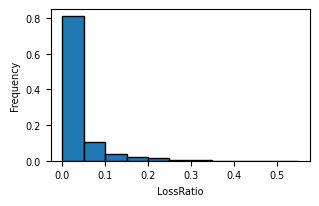

In [341]:
import numpy as np
min_val = combinedGDF_comparison["LossRatio"].min()
max_val = combinedGDF_comparison["LossRatio"].max()
bins = np.arange(min_val, max_val + 0.05, 0.05)

fig, ax = plt.subplots(figsize=(85*mm, 50*mm))

# Compute histogram
hist, edges = np.histogram(combinedGDF_comparison["LossRatio"], bins=bins)
freq = hist / float(hist.sum())

# Plot
width = np.diff(edges)  # This will all be 0.05
ax.bar(edges[:-1], freq, width=width, align="edge", ec="k")

# # Add frequency labels above bars
# for x, y in zip(edges[:-1], freq):
#     if y > 0:  # only label non-empty bins
#         plt.text(x + width[0] / 2, y, f"{100*y:.1f}%", ha="center", va="bottom")

plt.xlabel("Shading losses")
plt.ylabel("Frequency")
plt.savefig("/home/jaumeasensio/Documents/Papers/Paper TFM/0_Final Figures/Pretractades/ShadingHist.pdf", dpi=600, bbox_inches='tight')  # dpi affects rasterized part only¡
plt.show()